In [19]:
import os 
from natsort import natsorted
import torch

def load_data(dir_path): 
    if not os.path.exists(dir_path):
        print('file not found')
        return
    entries = os.listdir(dir_path)
    files = natsorted(entries)
    
    list_of_graphs = []
    list_of_iso_graph = []

    for idx, file in enumerate(files):
        if file.endswith('.pt'):
            data = torch.load(os.path.join(dir_path, file))
            list_of_iso_graph.append(data)
            if (idx + 1) % 100 == 0:
                # print(f"Condition is True")
                list_of_graphs.append(list_of_iso_graph)
                list_of_iso_graph = []

    return list_of_graphs
    
list_of_graphs = load_data('../../../training_data/data/task_from_graph_dag_over_network_test')


Condition is True
Condition is True
Condition is True
Condition is True
Condition is True
Condition is True
Condition is True
Condition is True
Condition is True
Condition is True


In [29]:
import torch
from v1.model import GCN

def do_inference(data, model_path, input_features=6):
    model_state_dict = torch.load(model_path,  map_location=torch.device('cpu'))
    model =  GCN(num_node_features=input_features).to(torch.device('cpu'))
    model.load_state_dict(model_state_dict)
    pred_latency = model(data.x, data.edge_index, data.batch)
    actual_latency = data.y
    model.load_state_dict(model_state_dict)
    return pred_latency.item(), actual_latency.item()

data = list_of_graphs[0][0]
pred, actual = do_inference(data, "v1/LatNet_100_state_dict.pth")

print(f"Predicted latency: {pred}")
print(f"Actual latency: {actual}")

Predicted latency: 2102.51806640625
Actual latency: 2077.0


Lenfth of random_10_filetred_list: 10
Lenfth of random_10_filetred_list[0]: 10


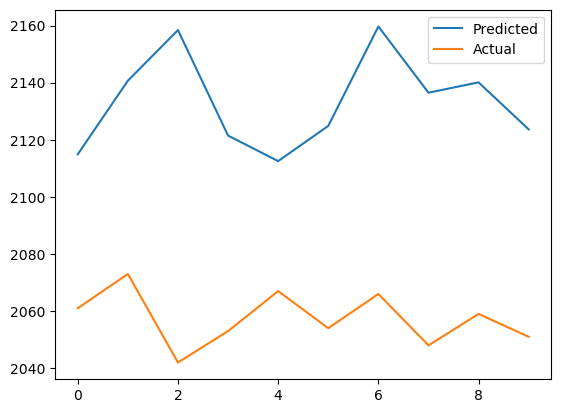

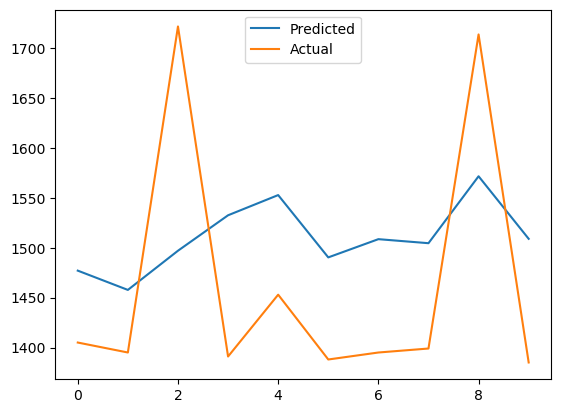

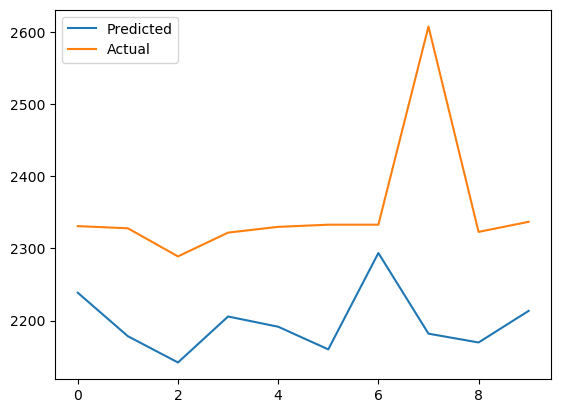

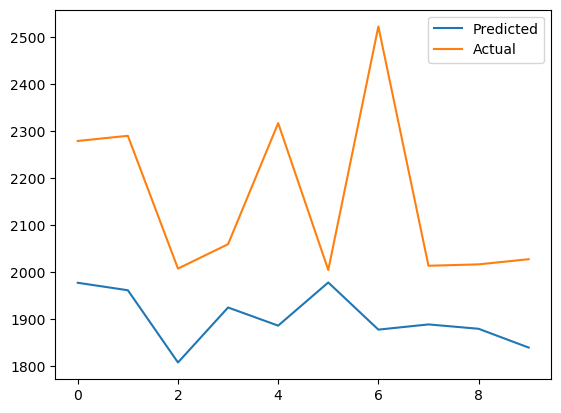

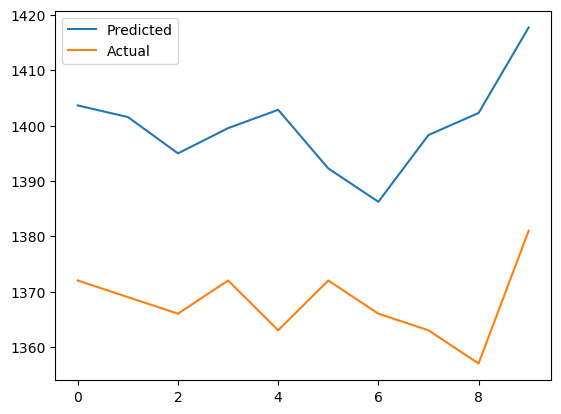

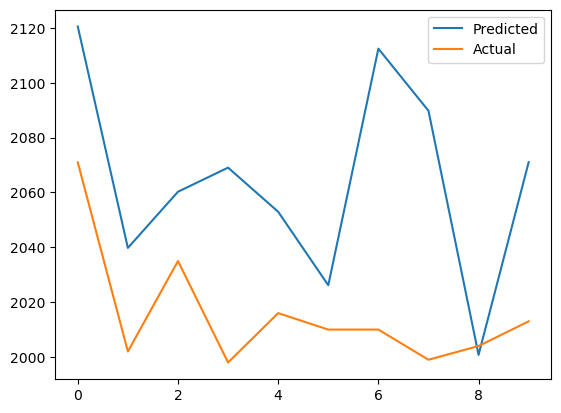

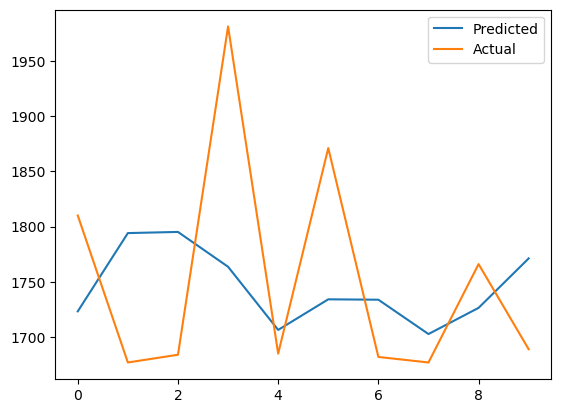

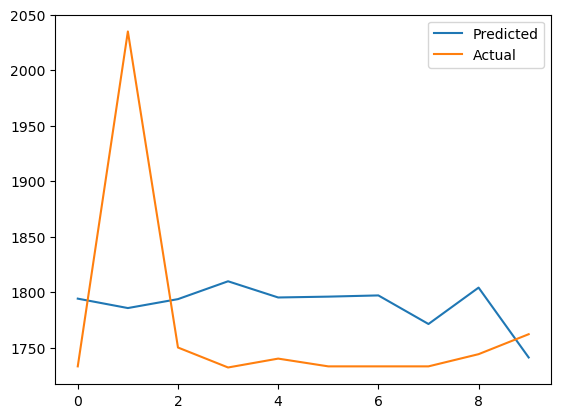

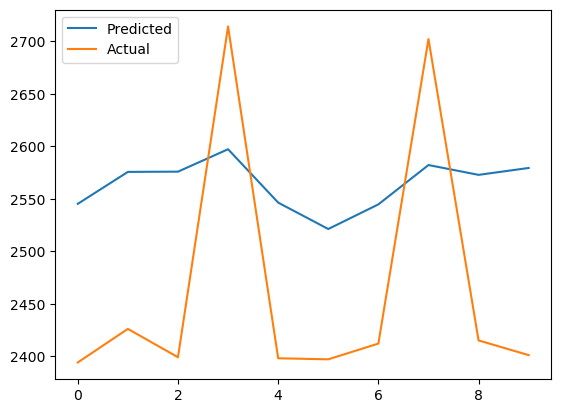

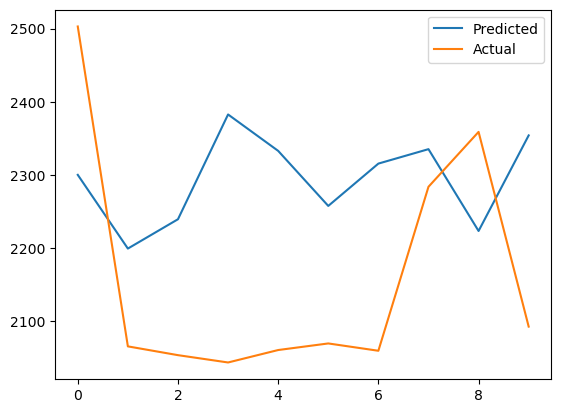

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import random



random_10_filetred_list = []
for list_of_iso in list_of_graphs:
    random_10_filetred_list.append(random.sample(list_of_iso, 10))

print(f"Lenfth of random_10_filetred_list: {len(random_10_filetred_list)}")
print(f"Lenfth of random_10_filetred_list[0]: {len(random_10_filetred_list[0])}")

for list_of_iso in random_10_filetred_list:

    list_of_pred = []
    list_of_actual = []
    for data in list_of_iso:
        pred, actual = do_inference(data, "v1/LatNet_250_state_dict.pth")
        list_of_pred.append(pred)
        list_of_actual.append(actual)


    plt.plot(list_of_pred, label='Predicted')
    plt.plot(list_of_actual, label='Actual')
    plt.legend()
    plt.show()
        

